
Shape of movies data frame:  (4803, 24)

Selected relevant features for recommendation: 
 ['genres', 'keywords', 'tagline', 'cast', 'director']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 no

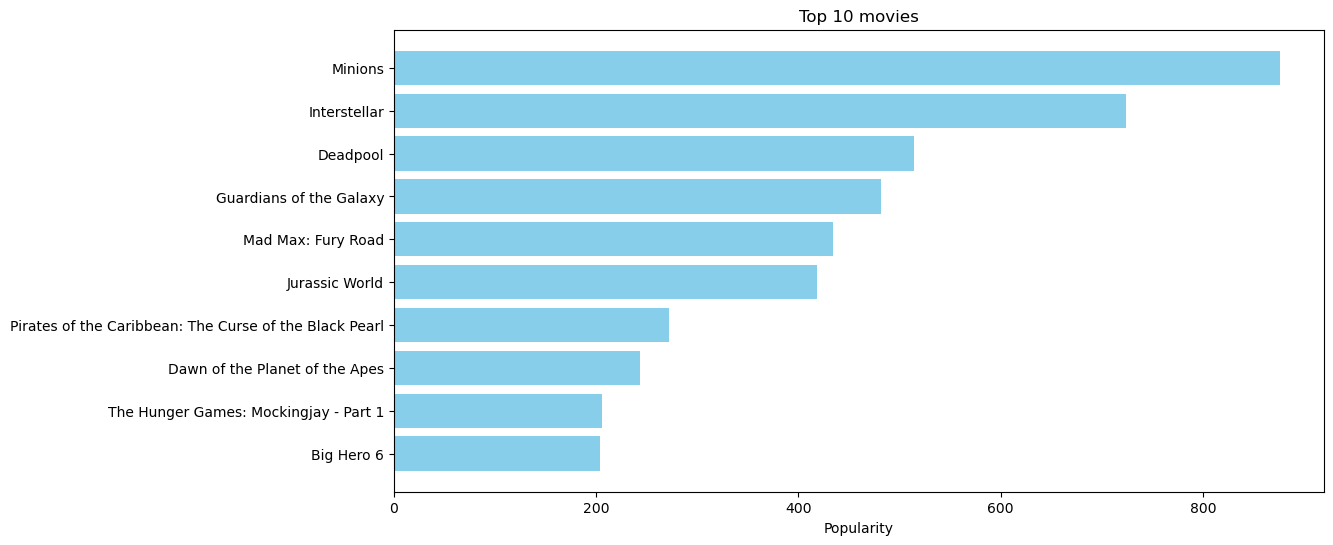


Enter your favourite movie name : kong

Length of the List of all titles: 4803

Close match to movie name is:  Congo
Movies suggested for you : 

1 . Congo
2 . Re-Kill
3 . Bleeding Hearts
4 . The Remains of the Day
5 . The Helix... Loaded
6 . Planet of the Apes
7 . Bats
8 . The Oogieloves in the Big Balloon Adventure
9 . Love Actually
10 . The Mothman Prophecies
11 . Man of the Year
12 . Supernova
13 . You Can Count on Me
14 . Jindabyne
15 . Speed 2: Cruise Control
16 . Young Guns
17 . The Men Who Stare at Goats
18 . The Crow
19 . The Watcher
20 . Man on a Ledge
21 . X-Men: First Class
22 . Courage Under Fire
23 . Country Strong
24 . The 33
25 . The Stepfather
26 . Dwegons
27 . The Life of David Gale
28 . Secretariat
29 . The 6th Day
30 . Driving Lessons


In [1]:
import numpy as np
import pandas as pd
import difflib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer - This is used to convert text data into numerical values
from sklearn.metrics.pairwise import cosine_similarity
import os

movies_data =pd.read_csv('movies.csv')
movies_data.head()

#Display the shape
print("\nShape of movies data frame: ",movies_data.shape)

#Selecting the relevant features for recommendation
selected_features = ['genres','keywords','tagline','cast','director']
print("\nSelected relevant features for recommendation: \n",selected_features)

#Display the info
print("\nMovies dataframe info: \n",movies_data.info())

#Check for Null Values
print ("\nNull values: \n",movies_data.isna().sum())

#Display the selected columns
print("\nselected columns: \n",movies_data[selected_features].head())

#Check Null Values in selected columns
print("\nNull values in selected columns: \n",movies_data[selected_features].isna().sum())

#Replacing the null values with null string
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')
print("\nMovies data frame head: \n",movies_data.head())

#Combining all the 5 selected features
combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

#Converting the text data to feature vectors. This is to find cosine similarity
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
print("\nShape of feature vectors: ",feature_vectors.shape)
print ("\nFeature vectors: \n",feature_vectors)

#Getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)
print ("\nsimilarity scores: \n",similarity )

#Print Shape Cosine Similarity
print("\nShape of cosine similarity: ",similarity.shape)

print("\nplot of top 10 movies based on their popularity: \n")
def plot():
    popularity = movies_data.sort_values("popularity", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(popularity["title"].head(10), popularity["popularity"].head(10), align="center", color="skyblue")
    plt.gca().invert_yaxis()
    plt.title("Top 10 movies")
    plt.xlabel("Popularity")
    plt.show()
plot()

#Enter the movie name to get Similarity
movie_name = input('\nEnter your favourite movie name : ')
list_of_all_titles = movies_data['title'].tolist()

#Length of the List
print("\nLength of the List of all titles:",len(list_of_all_titles))

#Finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

#Display the close match
close_match = find_close_match[0]
print("\nClose match to movie name is: ",close_match)

#Finding the index of the movie with the title
index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

#Get the similarity row for the selected index
similarity_score = list(enumerate(similarity[index_of_the_movie]))

#Length of Similarity Score
len(similarity_score)

#Sorting the movies based on their similarity score
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

#Print the name of similar movies based on the index – Top 30
print('Movies suggested for you : \n')
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<=30):
    print(i, '.',title_from_index)
    i+=1
    
